In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import numpy as np

In [3]:
from utils.general_utils import get_outlier_info, get_outlier_val_counts

In [4]:
og_df = pd.read_csv('dataset/TrainDataset2023.csv')
og_df.rename(columns={'pCR (outcome)': 'pcr', 'RelapseFreeSurvival (outcome)': 'rfs'}, inplace=True)

In [5]:
og_df.head()

,ID,pcr,rfs,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


In [6]:
print(f'Number of Columns : {len(og_df.columns)}')
print(f'Total Features Column : {len(og_df.columns[3:])}')
print(f'ID Column : {og_df.columns[0]}')
print(f'Clasification Target Column : {og_df.columns[1]}')
print(f'Regression Target Column : {og_df.columns[2]}')

Number of Columns : 120
Total Features Column : 117
ID Column : ID
Clasification Target Column : pcr
Regression Target Column : rfs


In [7]:
og_df.dtypes[og_df.dtypes == 'object']

ID    object
dtype: object

# Outlier Analysis

In [8]:
# Cleaning the outliers by replacing the outlier values with the Upper gate of the quantile plot
outlier_info = {}

for col in og_df.columns[3:]:
    
    lower_outlier_gate, upper_outlier_gate = get_outlier_info(og_df[col])
    
    val_dict = get_outlier_val_counts(og_df[col], lower_outlier_gate, upper_outlier_gate)
    
    outlier_info[col] = val_dict[lower_outlier_gate][0] + val_dict[upper_outlier_gate][0]    
                

In [9]:
x_axis_val_batches = np.array_split(np.array(list(outlier_info.values())), 4)
x_axis_ticks_batches = np.array_split(np.array(list(outlier_info.keys())), 4)
y_axis_ranges = [len(vals) for vals in x_axis_val_batches]
y_axis_ranges

[30, 29, 29, 29]

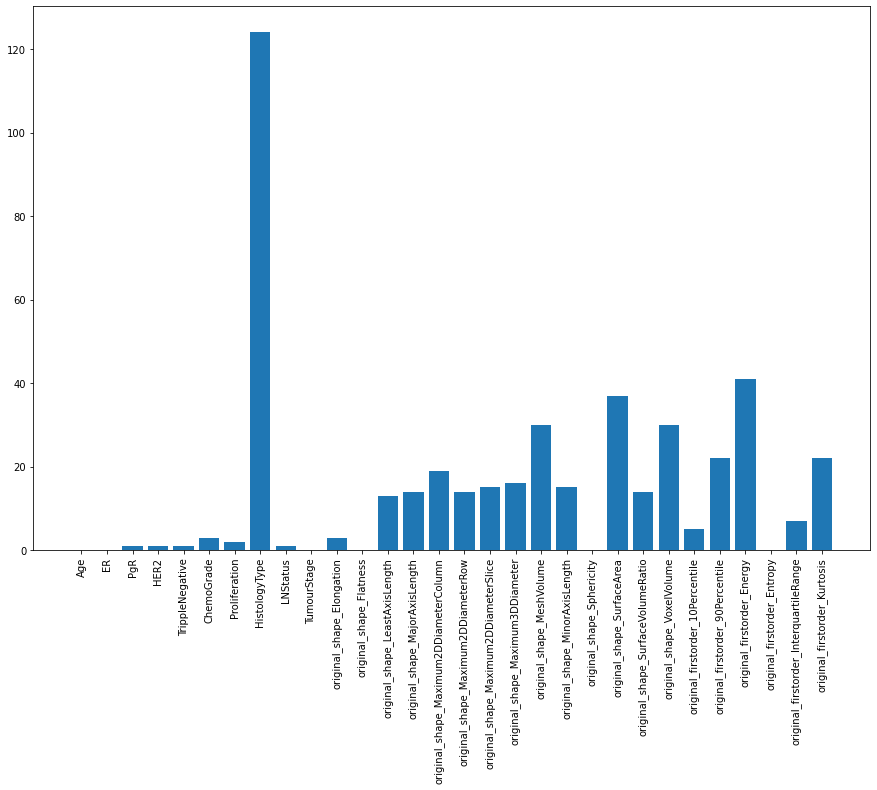

In [10]:
index = 0
plt.figure(figsize=(15,10))
plt.bar(range(y_axis_ranges[index]), x_axis_val_batches[index], align='center')
plt.xticks(range(y_axis_ranges[index]), x_axis_ticks_batches[index], rotation='vertical' )
plt.show()

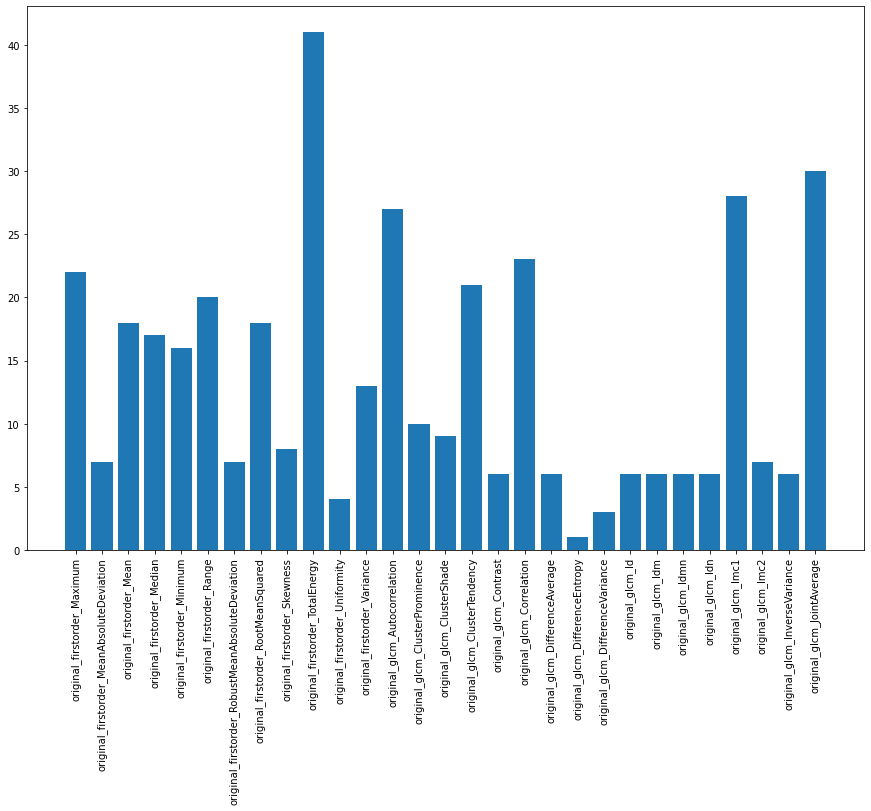

In [11]:
index = 1
plt.figure(figsize=(15,10))
plt.bar(range(y_axis_ranges[index]), x_axis_val_batches[index], align='center')
plt.xticks(range(y_axis_ranges[index]), x_axis_ticks_batches[index], rotation='vertical' )
plt.show()

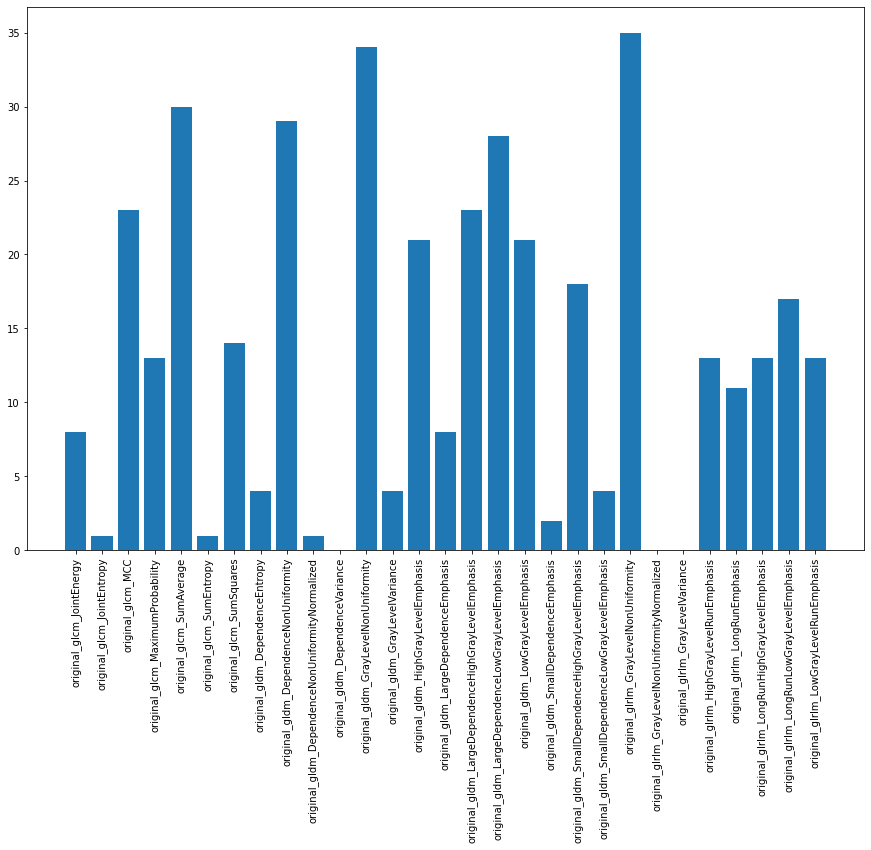

In [12]:
index = 2
plt.figure(figsize=(15,10))
plt.bar(range(y_axis_ranges[index]), x_axis_val_batches[index], align='center')
plt.xticks(range(y_axis_ranges[index]), x_axis_ticks_batches[index], rotation='vertical' )
plt.show()

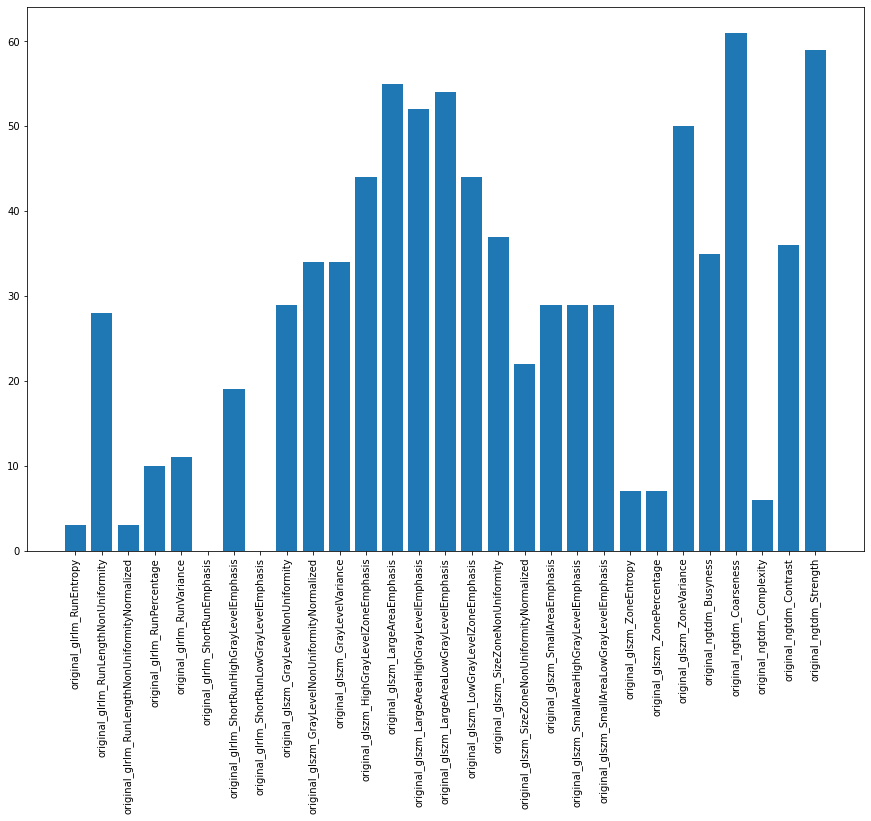

In [13]:
index = 3
plt.figure(figsize=(15,10))
plt.bar(range(y_axis_ranges[index]), x_axis_val_batches[index], align='center')
plt.xticks(range(y_axis_ranges[index]), x_axis_ticks_batches[index], rotation='vertical' )
plt.show()

## <span style="color:red">TODO</span> Possible ways to handle outliers 

# Identifying Missing values

In [14]:
missing_vals = np.sum(og_df == 999)
missing_vals[missing_vals > 0]

pcr                5
PgR                1
HER2               1
TrippleNegative    1
ChemoGrade         3
Proliferation      2
HistologyType      3
LNStatus           1
dtype: int64

In [15]:
og_df[og_df['pcr'] == 999]

,ID,pcr,rfs,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
10,TRG002244,999,129.000000,49.0,1,1,0,0,2,1,...,0.401346,0.401346,3.463495,0.006314,1.802648e+06,130.130448,0.002122,0.071682,0.004849,0.001858
342,TRG002859,999,77.250000,50.8,0,0,1,0,2,1,...,0.552088,0.552088,2.358335,0.004267,2.146306e+06,17.550245,0.014491,0.014363,0.000191,0.012191
366,TRG002895,999,65.583333,49.0,0,0,0,1,3,3,...,0.559912,0.559912,2.497224,0.008024,2.579188e+05,67.742319,0.004760,0.140481,0.019257,0.004422
372,TRG002904,999,63.666667,54.9,0,0,0,1,3,1,...,0.286114,0.286114,3.188722,0.003482,7.398163e+05,40.350115,0.007180,0.080830,0.007224,0.006673
373,TRG002905,999,63.666667,51.8,1,1,0,0,3,2,...,0.407157,0.407157,2.615320,0.007045,3.453065e+05,10.460087,0.024754,0.029957,0.000771,0.021602


## <span style="color:red">TODO</span> Possible ways to handle missing vales 

# Correlation Analysis

In [16]:
# og_df.iloc[:,2:12]
og_df.head()

,ID,pcr,rfs,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,TRG002178,0,142.0,39.0,1,1,0,0,3,3,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,TRG002204,1,135.0,31.0,0,0,0,1,2,1,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,TRG002206,0,12.0,35.0,0,0,0,1,3,3,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,TRG002210,0,109.0,61.0,1,0,0,0,2,1,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


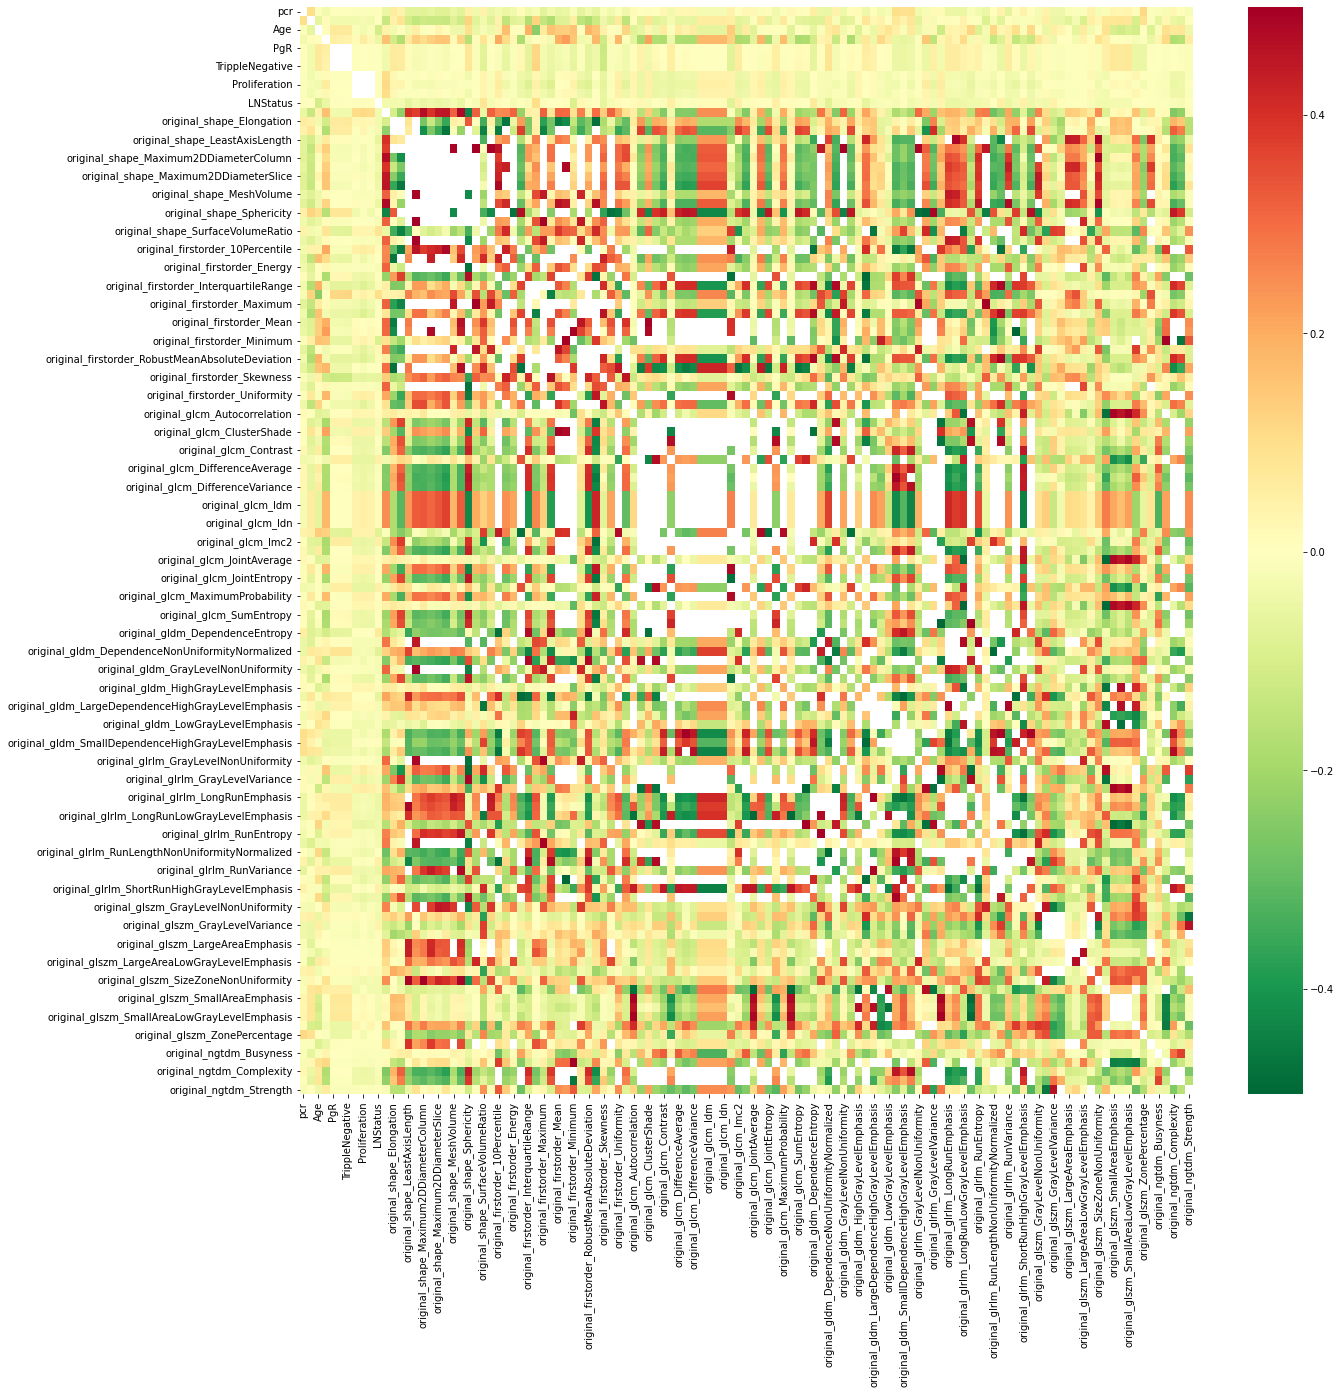

In [17]:
corr = og_df.drop(columns=['ID']).corr() 
corr_abs = corr.abs()
plt.figure(figsize=(20,20)) 
sns.heatmap(corr, cmap='RdYlGn_r', mask = (corr_abs >= 0.5)) 
plt.show()

## Choosing features to remove using a correlation threshold values

In [18]:
# Taking values above the diagonal getting the values only from it and making the other elements to NaN.
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

#Then taking values (absolute) of the each element and choosing the column to drop by various correlation threshold vales
to_drop_95 = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop_90 = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop_85 = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop_80 = [column for column in upper.columns if any(upper[column] > 0.80)]

print(f'Thresholding 95% correlated drop columns : {len(to_drop_95)}')
print(f'Thresholding 90% correlated drop columns : {len(to_drop_90)}')
print(f'Thresholding 85% correlated drop columns : {len(to_drop_85)}')
print(f'Thresholding 80% correlated drop columns : {len(to_drop_80)}')

Thresholding 95% correlated drop columns : 49
Thresholding 90% correlated drop columns : 64
Thresholding 85% correlated drop columns : 76
Thresholding 80% correlated drop columns : 85


## <span style="color:red">TODO</span> Possible ways to reduce features using DS and performing FS methods

## <span style="color:red">TODO</span> Check distribution of each continous feature columns
## <span style="color:red">TODO</span> Choose feature selection methods
<hr>

# Class Imbalance analysis
## <span style="color:red">TODO</span> Perform, resampling, SMOTE or anything relevent to stratify the class

Value Counts : pcr
0      311
1       84
999      5
Name: count, dtype: int64


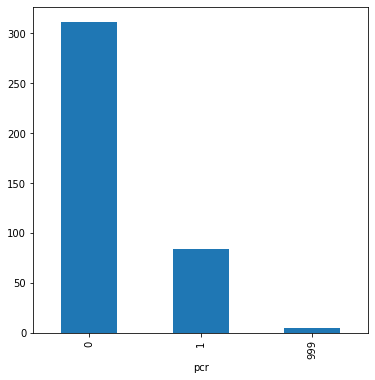

In [19]:
plt.figure(figsize=(6,6))
og_df['pcr'].value_counts().plot(kind='bar')
print(f'Value Counts : {og_df["pcr"].value_counts()}')
plt.show()

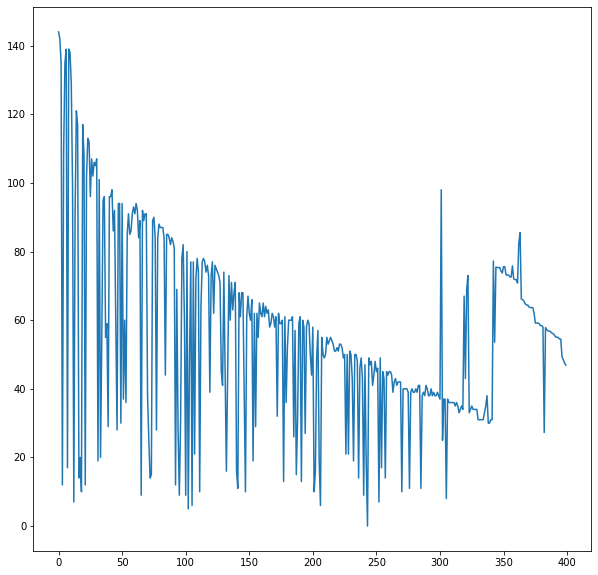

In [20]:
plt.figure(figsize=(10,10))
og_df['rfs'].plot(kind='line')
plt.show()

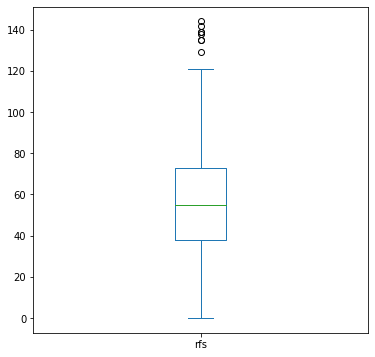

In [21]:
plt.figure(figsize=(6, 6))
og_df['rfs'].plot(kind='box')
plt.show()

## Histogram Plot - RFS

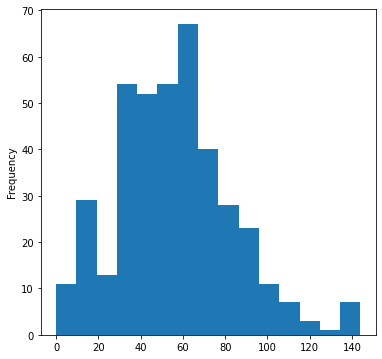

In [22]:
plt.figure(figsize=(6, 6))
og_df['rfs'].plot(kind='hist', bins=15)
plt.show()

## Kernel Density estimation plot

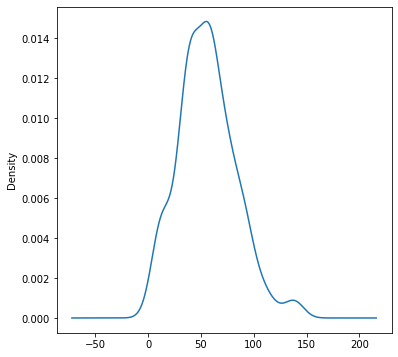

In [23]:
plt.figure(figsize=(6, 6))
og_df['rfs'].plot(kind='kde')
plt.show()

In [24]:
plt.plot(list(range(len(predicted))), predicted, color='orange', label='Predictions')


NameError: name 'predicted' is not defined

In [ ]:
to_drop_80